# Preço de casas em Boston

## Definição do Problema

O conjunto de dados Preço de casas em Boston involve a predição do preço de uma casa em milhares de dolares dado alguns atributos da casa e de sua vizinhança.

É um problema de regressão. Existem 506 observações com 13 features de entrada (atributos da casa e vizinhança) e 1 feature de saída (preço da casa). Os features são os seguintes:

 - CRIM: taxa de criminalidade.
 - ZN: proporção de territorios residenciais divididos em zonas para lotes acima de 25,000 sq.ft.
 - INDUS: proporção de acres de negócios não-varejo.
 - CHAS: Variável fictícia Charles River (= 1 se o limite do setor é rio; 0 caso contrário).
 - NOX: concentração de óxidos nítricos (partes por 10 milhões).
 - RM: número médio de quartos por habitação.
 - IDADE: proporção de unidades ocupadas pelo proprietário construídas antes de 1940.
 - DIS: distâncias ponderadas para cinco centros de emprego em Boston.
 - RAD: índice de acessibilidade às rodovias radiais.
 - IMPOSTO: taxa de imposto sobre propriedades de valor integral por US 10.000.
 - PTRATIO: relação aluno-professor por cidade.
 - B: 1000 (Bk - 0,63) ^ 2 onde Bk é a proporção de negros por cidade.
 - LSTAT: % menor status da população.
 - MEDV: Valor mediano de residências ocupadas pelo proprietário em US 1.000.

### Importação das bibliotecas

In [64]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn import ensemble
from sklearn import svm
from sklearn import tree
from sklearn import neighbors
from sklearn import model_selection 
from sklearn.preprocessing import StandardScaler,Normalizer
import seaborn as sns

### Carregando o dataset

In [16]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
print(boston.target.shape)

(506, 13)
(506,)


### Visualização e descrição dos dados

In [26]:
X = boston.data
X = 
y = boston.target
X.resize( (506, 14), refcheck=False )

In [27]:
X[:,13] = y

In [30]:
data = pd.DataFrame(X)
data.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0000,2.3100,0.0000,0.53800,6.57500,65.20000,4.09000,1.00000,296.00000,15.30000,396.90000,4.98000,24.0
1,0.00000,7.0700,0.0000,0.4690,6.42100,78.90000,4.96710,2.00000,242.00000,17.80000,396.90000,9.14000,0.02729,21.6
2,7.07000,0.0000,0.4690,7.1850,61.10000,4.96710,2.00000,242.00000,17.80000,392.83000,4.03000,0.03237,0.00000,34.7
3,0.00000,0.4580,6.9980,45.8000,6.06220,3.00000,222.00000,18.70000,394.63000,2.94000,0.06905,0.00000,2.18000,33.4
4,0.45800,7.1470,54.2000,6.0622,3.00000,222.00000,18.70000,396.90000,5.33000,0.02985,0.00000,2.18000,0.00000,36.2
5,6.43000,58.7000,6.0622,3.0000,222.00000,18.70000,394.12000,5.21000,0.08829,12.50000,7.87000,0.00000,0.52400,28.7
6,66.60000,5.5605,5.0000,311.0000,15.20000,395.60000,12.43000,0.14455,12.50000,7.87000,0.00000,0.52400,6.17200,22.9
7,5.95050,5.0000,311.0000,15.2000,396.90000,19.15000,0.21124,12.50000,7.87000,0.00000,0.52400,5.63100,100.00000,27.1
8,5.00000,311.0000,15.2000,386.6300,29.93000,0.17004,12.50000,7.87000,0.00000,0.52400,6.00400,85.90000,6.59210,16.5
9,311.00000,15.2000,386.7100,17.1000,0.22489,12.50000,7.87000,0.00000,0.52400,6.37700,94.30000,6.34670,5.00000,18.9


In [32]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,65.663145,65.473807,65.638888,66.356726,65.525324,63.678311,64.617366,63.313639,64.922545,64.295561,65.560898,66.421911,64.358904,22.532806
std,141.740229,142.348074,143.863435,143.717389,141.170971,137.990500,139.303329,139.947886,141.341579,140.415864,141.024650,142.473624,139.613153,9.197104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,0.416750,0.454250,0.448250,0.462250,0.458750,0.496500,0.488250,0.488250,0.491500,0.470250,0.441000,0.485250,0.439750,17.025000
50%,6.108850,6.000000,6.099000,6.069500,6.196500,6.318000,6.147500,6.030000,6.095500,6.209800,6.205500,6.134500,5.972500,21.200000
75%,21.747500,21.350000,21.150000,24.000000,24.000000,22.447825,24.000000,21.897500,22.038325,21.170000,23.825000,22.750000,23.922500,25.000000
max,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,711.000000,711.000000,711.000000,711.000000,711.000000,666.000000,50.000000


In [34]:
corr = data.corr()
corr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,-0.125280,0.301008,-0.042189,-0.171495,-0.105068,-0.180184,-0.174983,-0.116202,-0.168485,-0.059670,0.280002,-0.124642,-0.062906
1,-0.125280,1.000000,-0.122413,0.293204,-0.051504,-0.168109,-0.113601,-0.174346,-0.176421,-0.112838,-0.168028,-0.062075,0.291405,-0.009369
2,0.301008,-0.122413,1.000000,-0.124323,0.319274,-0.061500,-0.166077,-0.122042,-0.175875,-0.175179,-0.111910,-0.165172,-0.052677,0.028595
3,-0.042189,0.293204,-0.124323,1.000000,-0.126396,0.298254,-0.060428,-0.162457,-0.118607,-0.178377,-0.181028,-0.112679,-0.168507,0.051709
4,-0.171495,-0.051504,0.319274,-0.126396,1.000000,-0.125678,0.312576,-0.053185,-0.165068,-0.116222,-0.182763,-0.182326,-0.107786,0.067100
5,-0.105068,-0.168109,-0.061500,0.298254,-0.125678,1.000000,-0.123129,0.261063,-0.046407,-0.168592,-0.099198,-0.181779,-0.178211,0.084226
6,-0.180184,-0.113601,-0.166077,-0.060428,0.312576,-0.123129,1.000000,-0.124269,0.268928,-0.049845,-0.170765,-0.102498,-0.180445,0.007442
7,-0.174983,-0.174346,-0.122042,-0.162457,-0.053185,0.261063,-0.124269,1.000000,-0.121927,0.303123,-0.051438,-0.169642,-0.103836,-0.013916
8,-0.116202,-0.176421,-0.175875,-0.118607,-0.165068,-0.046407,0.268928,-0.121927,1.000000,-0.124521,0.327243,-0.056299,-0.165368,-0.038399
9,-0.168485,-0.112838,-0.175179,-0.178377,-0.116222,-0.168592,-0.049845,0.303123,-0.124521,1.000000,-0.124965,0.333058,-0.054761,-0.055876


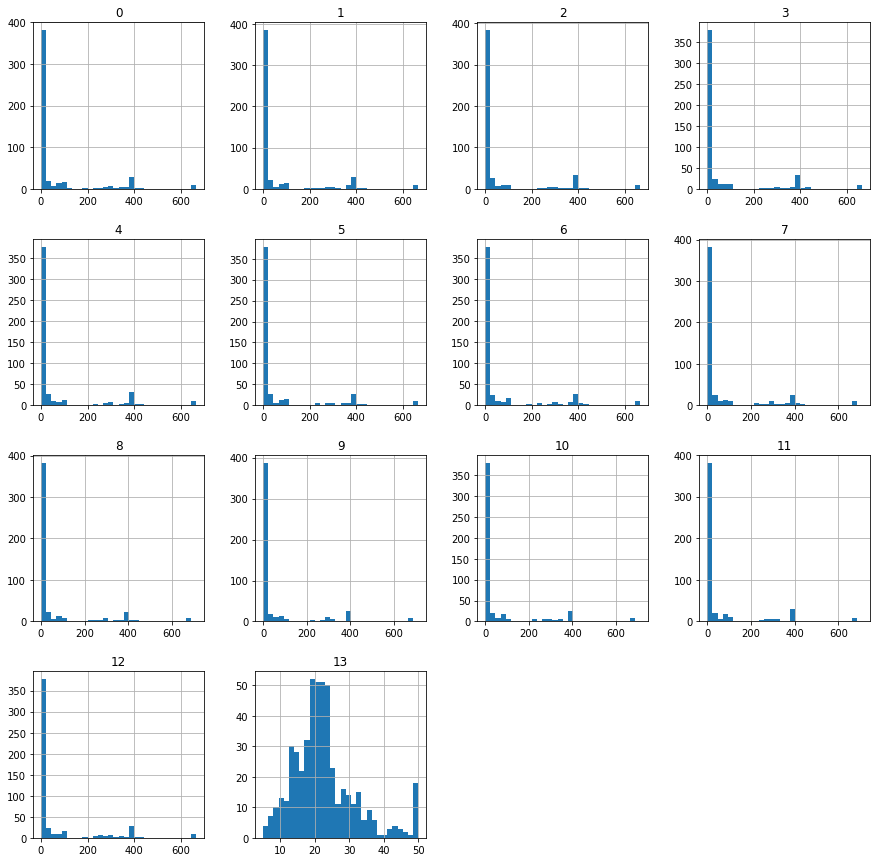

In [47]:
data.hist(figsize=(15,15), bins=30);

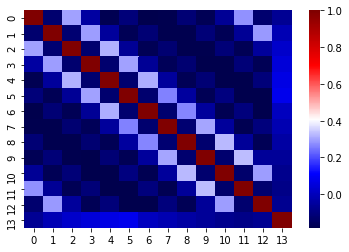

In [35]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            cmap='seismic')


### Criação do dataset de validação 

In [38]:
X = X[:,0:13]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=42)
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape



((506, 13), (506,), (339, 13), (339,), (167, 13), (167,))

### Criação dos modelos

#### Classificadores utilizados:

- Linear Regression
- Linear SVR
- SVR - Epsilon-Support Vector Regression
- Random Forest Regressor
- Gradient Boosting Regressor
- Extra Tree Regressor
- KNN
- SGDC

In [52]:
resultados = {}
resultados['LR'] = { 'model': linear_model.LinearRegression() }
resultados['LSVR'] = { 'model': svm.LinearSVR() }
resultados['SVR'] = { 'model': svm.SVR(kernel='linear') }
resultados['RFR'] = { 'model': ensemble.RandomForestRegressor() }
resultados['GBR'] = {'model': ensemble.GradientBoostingRegressor()}
resultados['ETR'] = {'model': tree.ExtraTreeRegressor()}
resultados['KNN'] = {'model': neighbors.KNeighborsRegressor()}
resultados['SGDC'] = {'model': linear_model.SGDRegressor(max_iter=1000)}

In [53]:
for key in resultados:
    print('processando {}...'.format(key))
    resultados[key]['model'].fit(X_train, y_train)
    resultados[key]['y_pred'] = resultados[key]['model'].predict(X_test)
    resultados[key]['mse'] = metrics.mean_squared_error(y_test, resultados[key]['y_pred'])
    resultados[key]['rmse'] = np.sqrt(resultados[key]['mse'])
    resultados[key]['mae'] = metrics.mean_absolute_error(y_test, resultados[key]['y_pred'])

processando LR...
processando LSVR...
processando SVR...
processando RFR...
processando GBR...
processando ETR...
processando KNN...
processando SGDC...


In [54]:
df = pd.DataFrame(resultados)
df.T[['y_pred','mse','rmse','mae']]

,y_pred,mse,rmse,mae
ETR,"[50.0, 43.1, 19.427272727272726, 23.9, 12.8, 4...",138.63,11.7741,8.30925
GBR,"[32.20872830077717, 25.01745262211457, 19.7582...",73.5743,8.57755,6.58016
KNN,"[31.060000000000002, 23.32, 19.44, 28.2, 16.24...",83.623,9.14456,6.99246
LR,"[24.82933944544287, 22.83690665719788, 25.4869...",90.882,9.53321,7.06453
LSVR,"[34.19370033068295, 22.51181735231319, 14.7519...",267.714,16.362,12.5681
RFR,"[35.519999999999996, 23.229999999999997, 19.46...",83.0659,9.11405,7.16205
SGDC,"[25596502117186.074, -12330018606909.99, -6494...",2.37328e+27,4.87164e+13,3.71909e+13
SVR,"[24.17724860791423, 21.3722514368772, 24.04705...",81.7455,9.04132,6.37105


In [55]:
df_T = df.transpose()
df_T = df_T[ ['rmse','mae'] ]
df_T

,rmse,mae
ETR,11.7741,8.30925
GBR,8.57755,6.58016
KNN,9.14456,6.99246
LR,9.53321,7.06453
LSVR,16.362,12.5681
RFR,9.11405,7.16205
SGDC,4.87164e+13,3.71909e+13
SVR,9.04132,6.37105


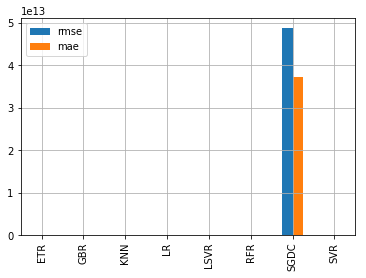

In [56]:
df_T.plot(kind='bar', grid=True);

In [74]:
norm = Normalizer()
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)
X_test_std = std.transform(X_test)
for key in resultados:
    print('processando {}...'.format(key))
    resultados[key]['model'].fit(X_train_norm, y_train)
    resultados[key]['y_pred_norm'] = resultados[key]['model'].predict(X_test_norm)
    resultados[key]['mse_norm'] = metrics.mean_squared_error(y_test, resultados[key]['y_pred_norm'])
    resultados[key]['rmse_norm'] = np.sqrt(resultados[key]['mse_norm'])
    resultados[key]['mae_norm'] = metrics.mean_absolute_error(y_test, resultados[key]['y_pred_norm'])
    resultados[key]['model'].fit(X_train_std, y_train)
    resultados[key]['y_pred_std'] = resultados[key]['model'].predict(X_test_std)
    resultados[key]['mse_std'] = metrics.mean_squared_error(y_test, resultados[key]['y_pred_std'])
    resultados[key]['rmse_std'] = np.sqrt(resultados[key]['mse_std'])
    resultados[key]['mae_std'] = metrics.mean_absolute_error(y_test, resultados[key]['y_pred_std'])

processando LR...
processando LSVR...
processando SVR...
processando RFR...
processando GBR...
processando ETR...
processando KNN...
processando SGDC...


In [75]:
df = pd.DataFrame(resultados)
df.T[['rmse_norm','mae_norm','rmse_std','mae_std']]

,rmse_norm,mae_norm,rmse_std,mae_std
ETR,11.2665,8.32782,11.6681,8.56794
GBR,9.1214,6.801,8.56128,6.57951
KNN,8.88923,6.77269,9.27393,7.09557
LR,9.35667,6.93915,9.53321,7.06453
LSVR,8.717,6.07375,9.00805,6.2728
RFR,9.35533,6.98021,9.14433,6.98446
SGDC,9.34925,6.92627,9.53214,7.06507
SVR,8.81205,6.16631,9.02264,6.36023


In [76]:
df_T = df.transpose()
df_T = df_T[ ['rmse_norm','mae_norm','rmse_std','mae_std'] ]
df_T

,rmse_norm,mae_norm,rmse_std,mae_std
ETR,11.2665,8.32782,11.6681,8.56794
GBR,9.1214,6.801,8.56128,6.57951
KNN,8.88923,6.77269,9.27393,7.09557
LR,9.35667,6.93915,9.53321,7.06453
LSVR,8.717,6.07375,9.00805,6.2728
RFR,9.35533,6.98021,9.14433,6.98446
SGDC,9.34925,6.92627,9.53214,7.06507
SVR,8.81205,6.16631,9.02264,6.36023


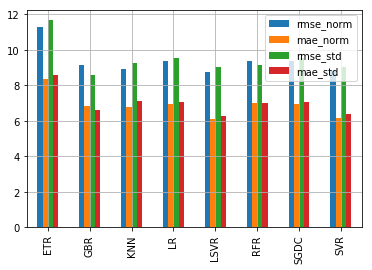

In [77]:
df_T.plot(kind='bar', grid=True);